#PGWAVE monthly file
This reads a PGWAVE-generated list of monthly seeds, as generated by Betta after 31 Aug 2015, makes plots


In [5]:
%matplotlib inline
month=1 # first month is 1
pgw_filename='/nfs/farm/g/glast/g/catalog/transients/TBIN_%d_all_pgw.txt'% (month-1)
assert os.path.exists(pgw_filename), 'File %s not found'% pgw_filensme

In [75]:
seeds = pd.read_table(pgw_filename, sep=' ', skipinitialspace=True, index_col=0,
        header=None,
        names='ra dec k_signif pgw_roi fgl_seed fgl_ra fgl_dec fgl_assoc'.split())

names=[]
for i,s in seeds.iterrows():
    j = int(s.name[4:6]) if s.name[6]=='_' else int(s.name[4:5])
    names.append('PGW_%02d_%03d_%02d' % (month, int(s.pgw_roi), j))
seeds['name'] = names
seeds['ra dec k_signif pgw_roi'.split()].describe()

,ra,dec,k_signif,pgw_roi
count,1641.000000,1641.000000,1641.000000,1641.000000
mean,182.502278,0.243516,8.040366,99.145643
std,104.721664,39.622242,9.630503,47.352094
min,1.149854,-84.673719,2.707000,0.000000
25%,85.780650,-32.835126,3.620000,68.000000
50%,187.895867,0.618157,4.794000,101.000000
75%,276.365134,31.810723,8.718000,130.000000
max,359.330089,87.930806,155.704000,191.000000


In [76]:
seeds.name

PGW_1_J1427+2354    PGW_01_000_01
PGW_2_J1358+3821    PGW_01_000_02
PGW_3_J1350+3029    PGW_01_000_03
PGW_4_J1332+2230    PGW_01_000_04
PGW_5_J1327+1851    PGW_01_000_05
PGW_6_J1310+3222    PGW_01_000_06
PGW_7_J1313+2409    PGW_01_000_07
PGW_1_J1236+4601    PGW_01_001_01
PGW_2_J1245+3655    PGW_01_001_02
PGW_3_J1220+3023    PGW_01_001_03
PGW_4_J1310+3220    PGW_01_001_04
PGW_5_J1220+2806    PGW_01_001_05
PGW_1_J1256-0541    PGW_01_010_01
PGW_2_J1255-0625    PGW_01_010_02
PGW_3_J1230+0211    PGW_01_010_03
...
PGW_4_J0732-2150     PGW_01_098_04
PGW_5_J0720-1646     PGW_01_098_05
PGW_6_J0731-1902     PGW_01_098_06
PGW_7_J0731-1808     PGW_01_098_07
PGW_8_J0735-1539     PGW_01_098_08
PGW_9_J0729-1135     PGW_01_098_09
PGW_10_J0754-1156    PGW_01_098_10
PGW_11_J0826-2222    PGW_01_098_11
PGW_1_J0754-3546     PGW_01_099_01
PGW_2_J0835-4517     PGW_01_099_02
PGW_3_J0859-4822     PGW_01_099_03
PGW_4_J0907-4703     PGW_01_099_04
PGW_5_J0827-3722     PGW_01_099_05
PGW_6_J0925-4346     PGW_01_099

In [48]:
from skymaps import SkyDir
t=seeds
sdirs = map(SkyDir, t.ra,t.dec)
t['l']=[s.l() for s in sdirs]
t.l[t.l>180]-=360
t['b']=[s.b() for s in sdirs]

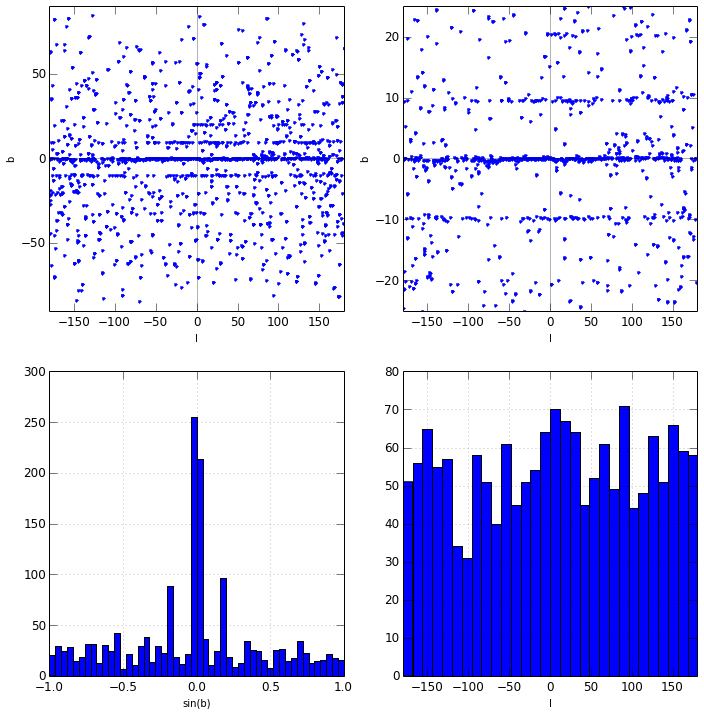

In [49]:
fig, axx = plt.subplots(2,2, figsize=(12,12))
ax = axx[0,0]
ax.plot(t.l, t.b, '.')
plt.setp(ax, xlabel='l', ylabel='b', xlim=(-180,180), ylim=(-90,90))
ax.axhline(0, color='k', alpha=0.3)
ax.axvline(0, color='k', alpha=0.3)
ax = axx[1,0]
sinb = np.sin(np.radians(t.b))
dom = np.linspace(-1,1,51)
ax.hist(list(sinb),dom);
plt.setp(ax, xlabel='sin(b)')
ax.grid(True, alpha=0.5)
ax = axx[0,1]
ax.plot(t.l, t.b, '.')
plt.setp(ax, xlabel='l', ylabel='b', xlim=(-180,180), ylim=(-25,25))
ax.axhline(0, color='k', alpha=0.3)
ax.axvline(0, color='k', alpha=0.3)
ax= axx[1,1]
ax.hist(list(t.l), np.linspace(-180, 180,31));
plt.setp(ax, xlim=(-180,180), xlabel='l')
ax.grid(True, alpha=0.5)

Save in my seed format?

In [50]:
a =t.fgl_assoc; a[:10]

PGW_1_J1427+2354          BZBJ1427+2348
PGW_2_J1358+3821                    NaN
PGW_3_J1350+3029    ERC217G051.33+76.54
PGW_4_J1332+2230                    NaN
PGW_5_J1327+1851                    NaN
PGW_6_J1310+3222    ERC030G085.86+83.31
PGW_7_J1313+2409          BZBJ1314+2348
PGW_1_J1236+4601                    NaN
PGW_2_J1245+3655          BZBJ1249+3707
PGW_3_J1220+3023             PG1218+304
Name: fgl_assoc, dtype: object

In [54]:
[np.isnan(x) for x in a]

TypeError: Not implemented for this type

In [41]:
pd.read_table?